# Imports

In [1]:
import ADC
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Audio

# Analysing ADC and choosing the sampling parameters

## Deciding number of samples

Reasonable choise of number of samples would be fs*t, where fs - frequency, t - time played in seconds. Next reasonable choise would be to choose fs=1000, t=5, in order to find out the range of time that interests us. If 5 seconds are not enough, we can increase the range. As for quantitization, we can choose arbitrary big number for now. The point is to choose one that would show when noise and speech stops. For that purposes Quant_levels=256 was chosen.

In [2]:
v = 4 
fs = 1000
samples = fs*5
quant_levels = np.linspace(-1,1,256)
# Sound recording
recorded_samples = ADC.rec(v, samples, quant_levels, fs)

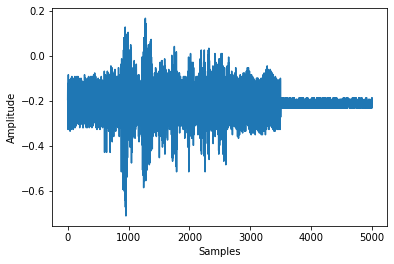

In [3]:
plt.plot(range(recorded_samples.shape[0]), recorded_samples)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

As we can see from the graph, sufficient number of samples would be roughly 3500, which means we need to choose t=3.5 seconds

## Choosing Quantization level

We will try to get the graph to look more like a sinus

In [10]:
v = 4 
fs = 1000
samples = int(fs*0.01)

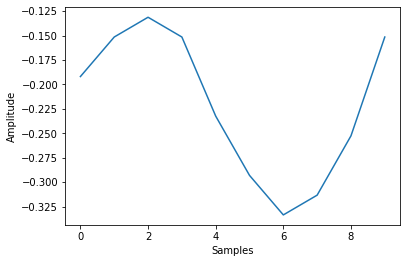

In [11]:
quant_levels = np.linspace(-1,1,100)
# Sound recording
recorded_samples = ADC.rec(v, samples, quant_levels, fs)
plt.plot(range(recorded_samples.shape[0]), recorded_samples)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

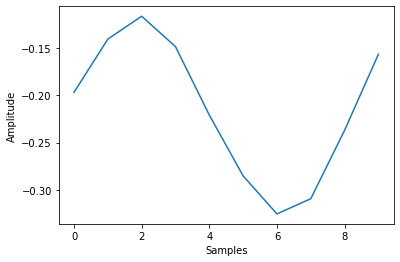

In [12]:
quant_levels = np.linspace(-1,1,250)
# Sound recording
recorded_samples = ADC.rec(v, samples, quant_levels, fs)
plt.plot(range(recorded_samples.shape[0]), recorded_samples)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

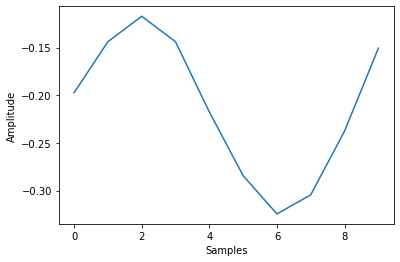

In [13]:
quant_levels = np.linspace(-1,1,300)
# Sound recording
recorded_samples = ADC.rec(v, samples, quant_levels, fs)
plt.plot(range(recorded_samples.shape[0]), recorded_samples)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

250 is enough (256 because I like the powers of 2)

## Choosing Frequency

I was deciding frequency based on hearings. I started at frequency 18000 and manually added 1000. The most statisfying result was at frequency 22000

## Plotting results

In [20]:
v = 4 # student number from 1 to 14 (ask your TA to get it)
# samples = 500 # number of samples to acquire
fs = 22000 # samples per second
samples = int(fs*3.5)
quant_levels = np.linspace(-1,1,2000)# twenty levels between -1 and 1

# Sound recording
recorded_samples = ADC.rec(v, samples, quant_levels, fs)

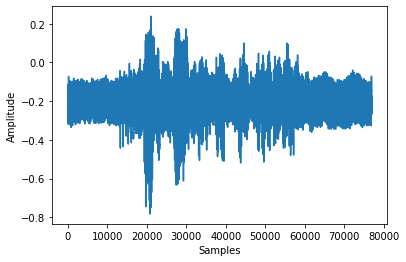

In [21]:
plt.plot(range(recorded_samples.shape[0]), recorded_samples)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

## Listening to the Result

In [22]:
Audio(recorded_samples,rate=fs)

# Sinusoidal signal Generation

## Compensating offset

The first thing we need to do is to compensate the amplitude offset. The easiest way to do it is to use dataset.mean

In [20]:
shifted_offset = recorded_samples - recorded_samples.mean()

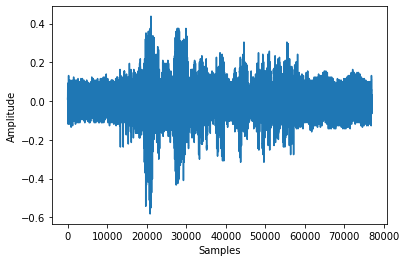

In [21]:
plt.plot(range(shifted_offset.shape[0]), shifted_offset)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

Now the graph is centered

In [22]:
Audio(shifted_offset,rate=fs)

## Sinusoidal Noise

The next thing we need to do is cancel out the noise of the following form: A *sin(2* pi * f * n/f_s). We were told, the noise is in range [120:210] Hz. Also, we were told, the amplitude A = 0.1

To find the maximal frequency, we will use Fast Fourier transform and will seek the correct frequency in our range:

In [221]:
import numpy as np

fourier = np.fft.fft(shifted_offset)
freq = np.fft.fftfreq(n = shifted_offset.size) *fs

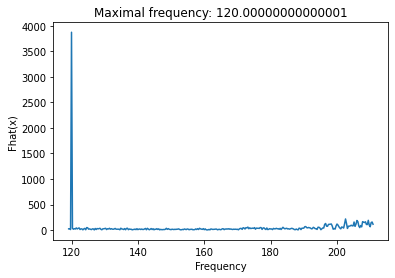

In [216]:
a = freq < 211
b = freq > 119
rng = a*b
fr = freq[rng]
four = np.absolute(fourier[rng])
plt.plot(fr, four)
plt.title(f'Maximal frequency: {fr[four.argmax()]}')
plt.xlabel('Frequency')
plt.ylabel('Fhat(x)')
plt.show()

Therefore, we conclude that frequency 120.00000000000001 is the correct one

In [218]:
A = 0.1
f = 120.00000000000001

array = np.arange(shifted_offset.size)
noise = A * np.sin(2 * np.pi * array * f/fs)

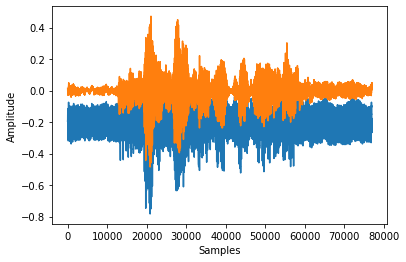

In [219]:
plt.plot(range(shifted_offset.shape[0]), recorded_samples, label='Initial Signal')
plt.plot(range(shifted_offset.shape[0]), shifted_offset-noise, label='Denoised signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

In [220]:
Audio(shifted_offset-noise,rate=fs)